In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
df = pd.read_csv("c:\\Users\\Bharath Reddy\\Final Project\\Revised Plan\\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       547 non-null    object
 1   race/ethnicity               547 non-null    object
 2   parental level of education  547 non-null    object
 3   lunch                        547 non-null    object
 4   test preparation course      547 non-null    object
 5   math score                   547 non-null    int64 
 6   reading score                547 non-null    int64 
 7   writing score                547 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 34.3+ KB


## Milestone-1

1) The cose data set of student performesnce sdhers to teh tidy principals.


## Data exploration 
Exploring data for further  analysis in Python.

1) Show the average scores for math, reading, and writing for each gender.

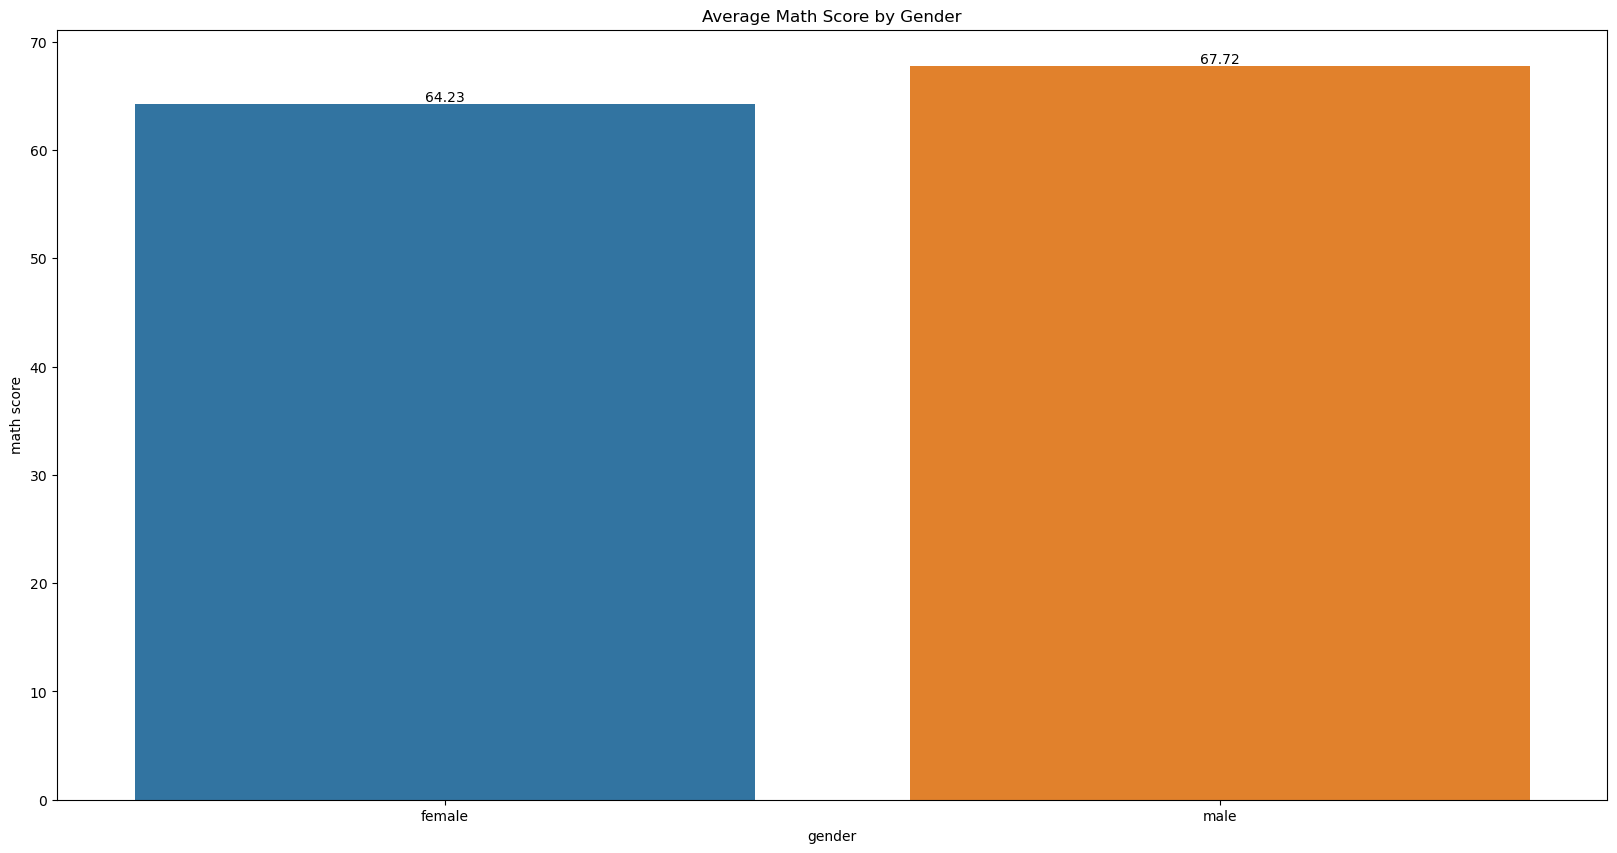

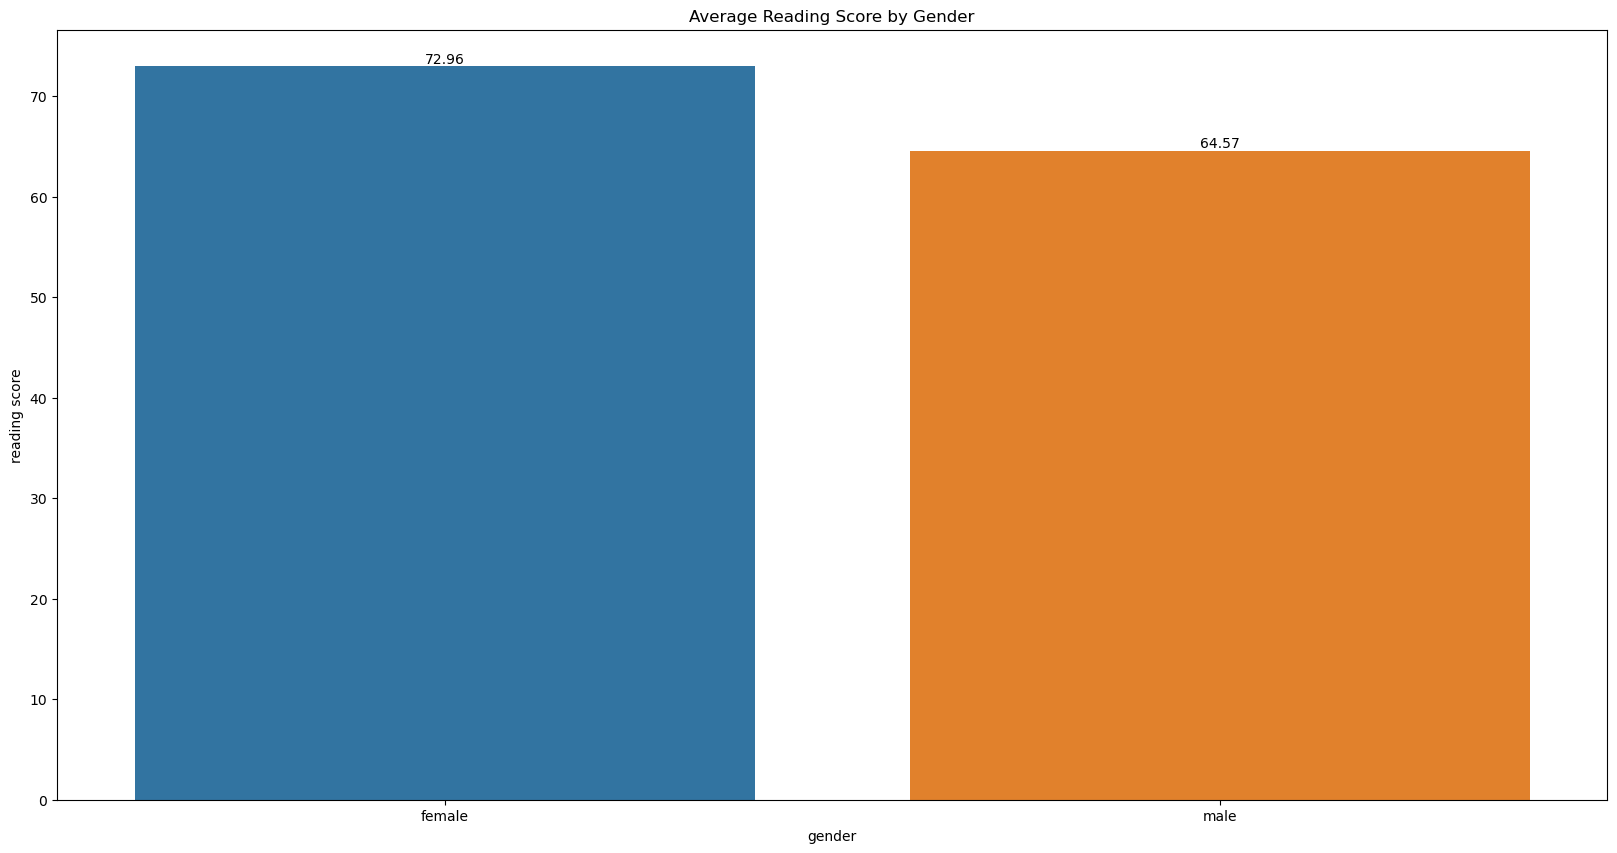

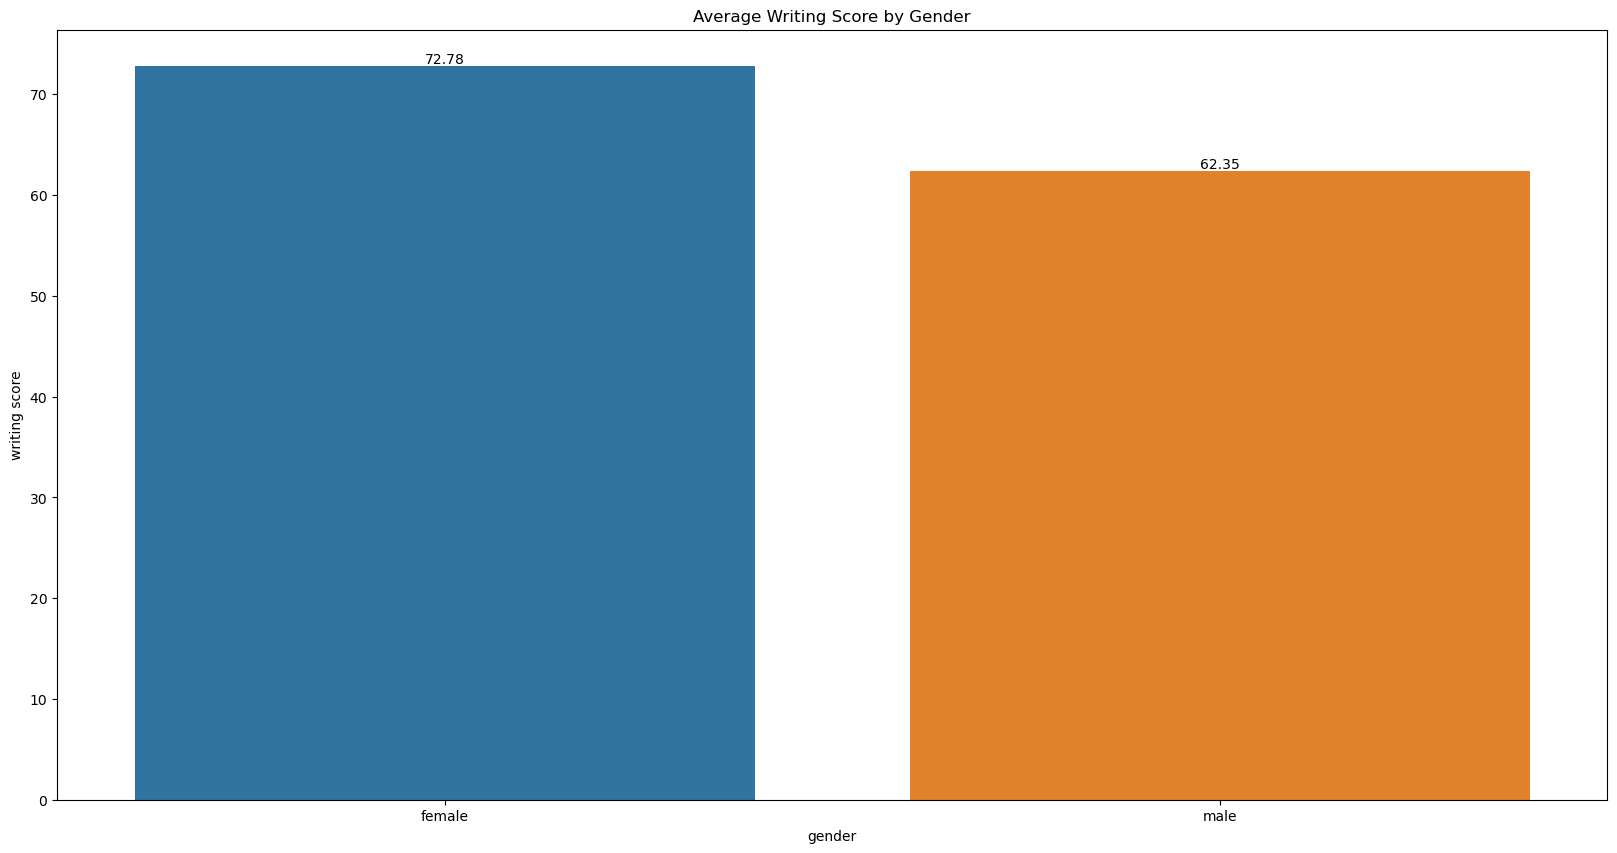

In [48]:
# Average scores by gender
sns.barplot(x='gender', y='math score', data=df, errorbar=None)
plt.title('Average Math Score by Gender')
# Add data labels to the bar plot
for index, value in enumerate(df.groupby('gender')['math score'].mean()):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.show()

sns.barplot(x='gender', y='reading score', data=df, errorbar=None)
plt.title('Average Reading Score by Gender')
for index, value in enumerate(df.groupby('gender')['reading score'].mean()):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.show()

sns.barplot(x='gender', y='writing score', data=df, errorbar=None)
plt.title('Average Writing Score by Gender')
for index, value in enumerate(df.groupby('gender')['writing score'].mean()):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.show()


## Math Scores Across Different Races/Ethnicities

The graph below shows how math scores vary for different groups based on race or ethnicity.

### What Does the Graph Show?

- Each box on the graph represents a different group of students based on their race or ethnicity.
- The height of the box shows where most students' scores fall.
- The line inside each box shows the average (or middle) score for that group.
- The top and bottom lines of each box show the highest and lowest scores.

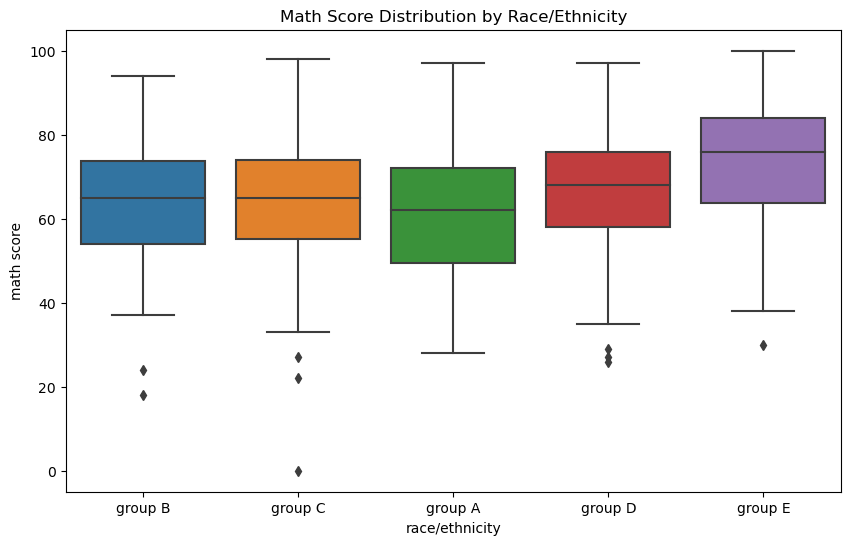

In [49]:
# Box plot for race/ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(x='race/ethnicity', y='math score', data=df)
plt.title('Math Score Distribution by Race/Ethnicity')
plt.show()

## Average Math Scores Based on Parental Education

The graph below shows the average math scores of students based on their parents' level of education.

### What Does the Graph Show?


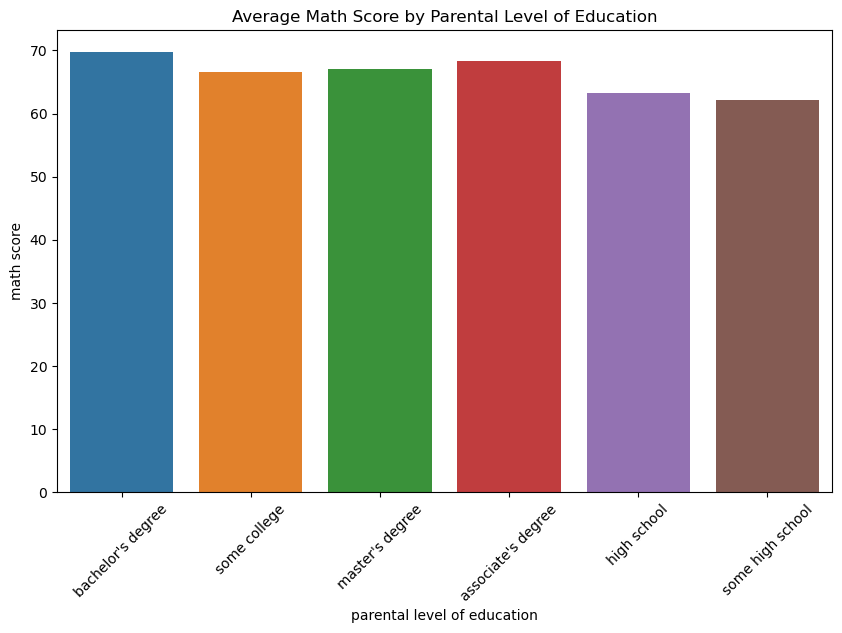

In [50]:
# Bar plot for parental level of education
plt.figure(figsize=(10, 6))
sns.barplot(x='parental level of education', y='math score', data=df, errorbar=None)
plt.xticks(rotation=45)
plt.title('Average Math Score by Parental Level of Education')
plt.show()

## Count of Parental Education Levels

- It helps us understand the educational background of the parents of students in our dataset.
- This information can be useful for educators, policymakers, and researchers to know more about the demographics of the student population.

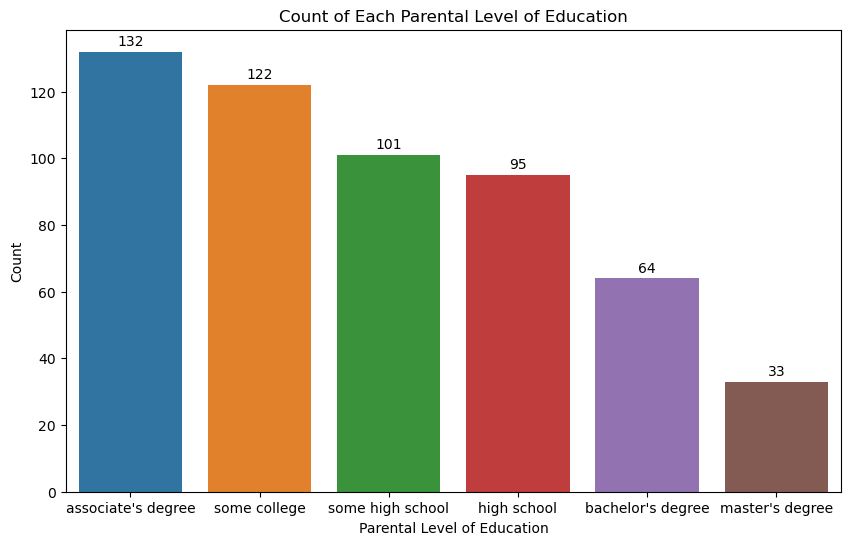

In [51]:
# Calculate the count of each 'parental level of education' category
education_counts = df['parental level of education'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')
plt.title('Count of Each Parental Level of Education')
# Add count numbers on top of each bar
for index, value in enumerate(education_counts.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

## Math Scores Distribution

We can see where most students' scores fall, whether they are high, low, or somewhere in between.

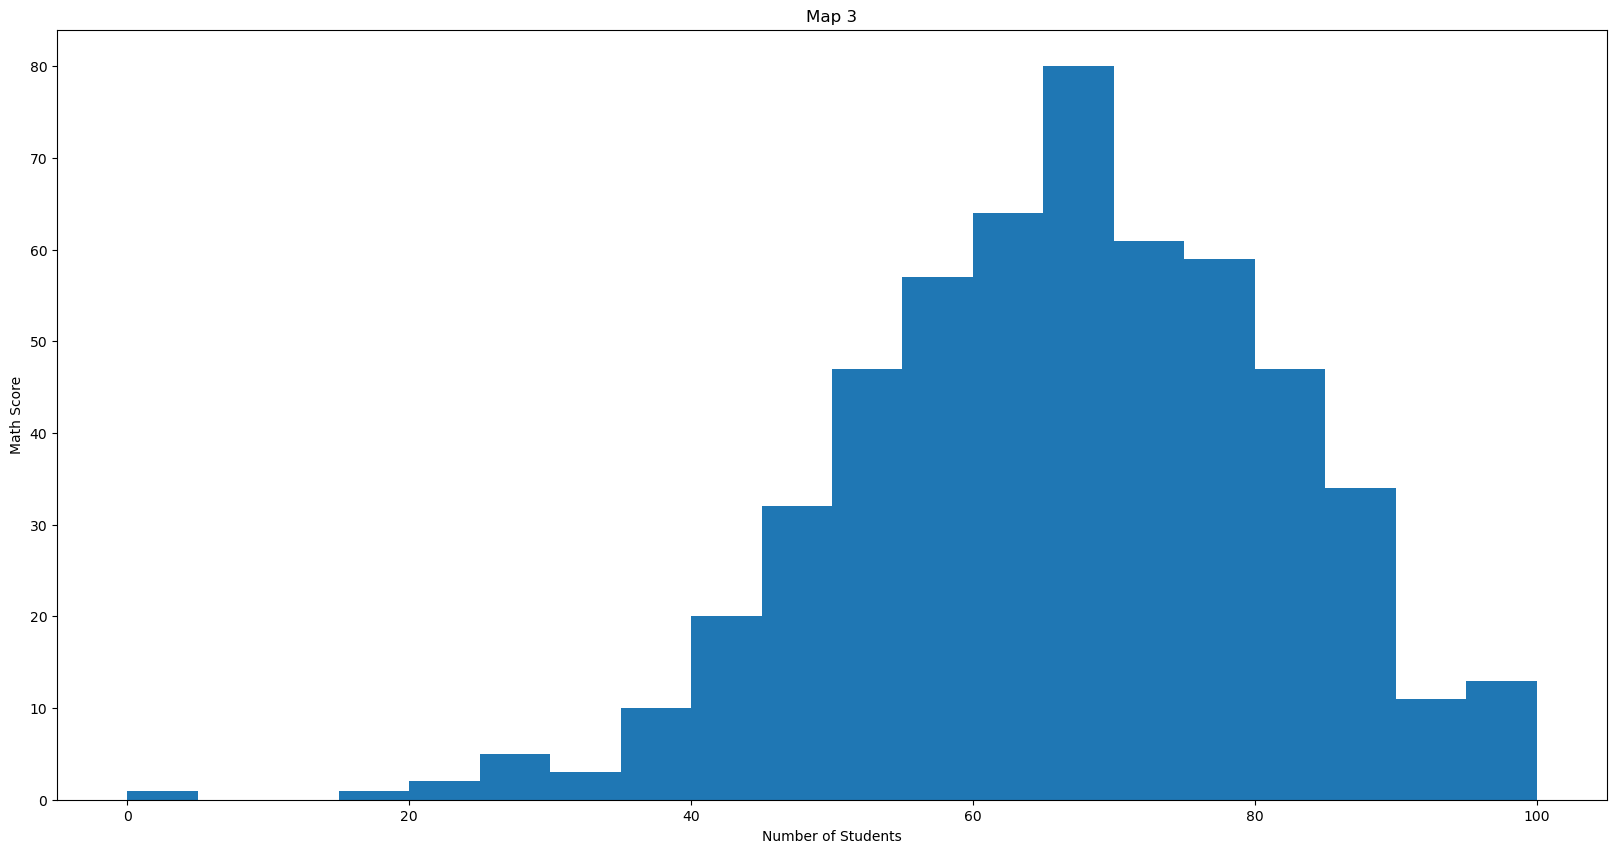

In [52]:
y = df['math score']
plt.xlabel('Number of Students')
plt.ylabel('Math Score')
plt.title('Map 3')
plt.hist(y, bins=20)
plt.show()

## Student Performance Analysis

### Writing, Reading, and Math Pass

- **Writing Pass**: Checks if a student's writing score is less than 40.
- **Reading Pass**: Checks if a student's reading score is less than 40.
- **Math Pass**: Checks if a student's math score is less than 40.

### Grades

The code calculates the total marks and percentage for each student and assigns a grade based on the following criteria:
- 'A' for 80% and above
- 'B' for 70% to 79%
- 'C' for 60% to 69%
- 'D' for 50% to 59%
- 'E' for 40% to 49%
- 'F' for below 40% or if the student has failed in any subject.
The results provide insights into the overall performance of students and help identify areas where additional support might be needed.

count 
 Write_Pass
P    528
F     19
Name: count, dtype: int64
Counts 
 Read_Pass
P    531
F     16
Name: count, dtype: int64
counts 
 Math_Pass
P    525
F     22
Name: count, dtype: int64
 counts 
 All3_Pass
Pass    517
Fail     30
Name: count, dtype: int64


Grade
B    144
C    138
A    105
D     96
E     34
F     30
Name: count, dtype: int64

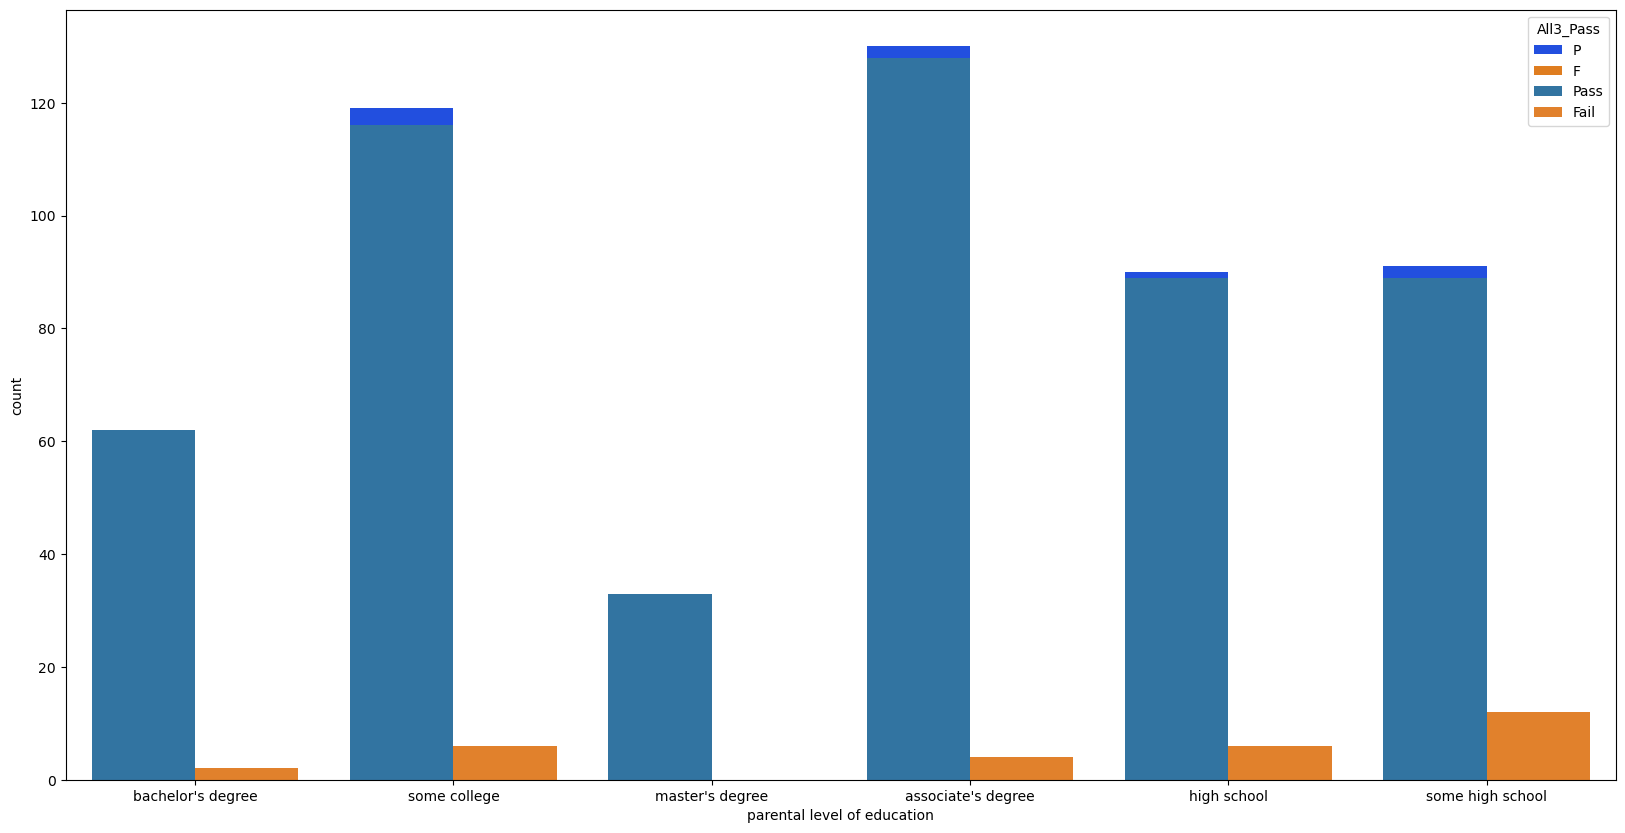

In [55]:
# Writting  Pass
df['Write_Pass'] = np.where(df['writing score'] < 40, 'F', 'P')
print('count \n', df['Write_Pass'].value_counts())
df['Read_Pass'] = np.where(df['reading score'] < 40, 'F','P')
print('Counts \n', df['Read_Pass'].value_counts())
# Math Pass Analysis
df['Math_Pass'] = np.where(df['math score'] < 40, 'F', 'P')
print('counts \n', df.Math_Pass.value_counts())
m =sns.countplot(x= 'parental level of education', data=df, hue='Math_Pass', palette='bright')
df['All3_Pass'] = df.apply(lambda x : 'Fail' if x['Math_Pass'] == 'F' or x['Read_Pass'] == 'F' or x['Write_Pass'] == 'F' else 'Pass', axis=1)
print(' counts \n', df['All3_Pass'].value_counts())
m = sns.countplot(x='parental level of education', data=df, hue='All3_Pass')
# Percentage of Marks
df['Total_Marks'] = df['math score'] + df['reading score'] + df['writing score']
df['Percentage'] = df['Total_Marks'] / 3

def GetGrade(Percentage, All3_Pass):
    if (All3_Pass == 'Fail'):
        return 'F'
    if (Percentage >= 80):
        return 'A'
    if (Percentage >= 70):
        return 'B'
    if (Percentage >= 60):
        return 'C'
    if (Percentage >= 50):
        return 'D'
    if (Percentage >= 40):
        return 'E'
    else:
        return 'F'
    
df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['All3_Pass']), axis=1)
df.Grade.value_counts()

## Distribution of Math, Reading, and Writing Scores

The graph below shows how math, reading, and writing scores are distributed among students using violin plots.

### What Does Each Graph Show?

- **Math Scores**: 
  - The purple (magenta) violin plot shows the distribution of math scores.
  - The wider sections of the violin plot indicate where most students' scores fall.
  - The narrow sections show where fewer students' scores fall.

- **Reading Scores**: 
  - The green violin plot represents the distribution of reading scores.
  - Similar to math scores, the wider sections indicate the most common score ranges, while the narrow sections show less common ranges.

- **Writing Scores**: 
  - The red violin plot displays the distribution of writing scores.
  - It shows the range and distribution of scores similarly to the math and reading plots.

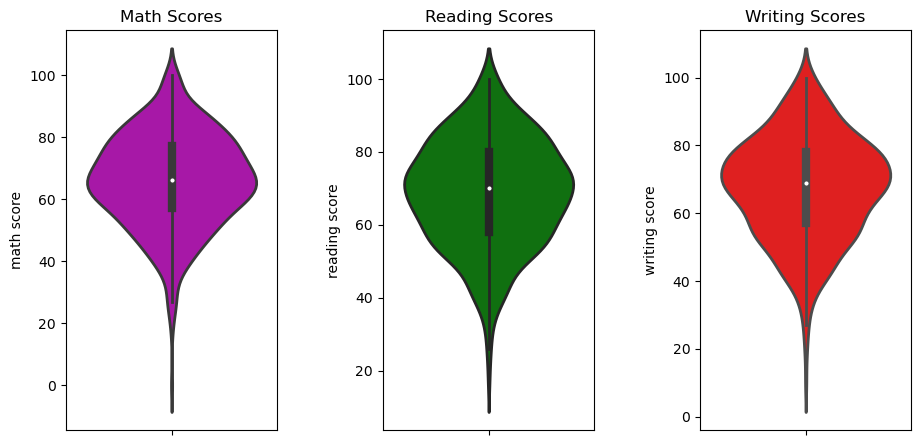

In [56]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Math Scores')
sns.violinplot(y='math score',data=df,color='m',linewidth=2)
plt.subplot(142)
plt.title('Reading Scores')
sns.violinplot(y='reading score',data=df,color='g',linewidth=2)
plt.subplot(143)
plt.title('Writing Scores')
sns.violinplot(y='writing score',data=df,color='r',linewidth=2)
plt.show()

## Performance Based on Test Preparation and Gender

The graph below shows how test preparation and gender might influence math, reading, and writing scores.


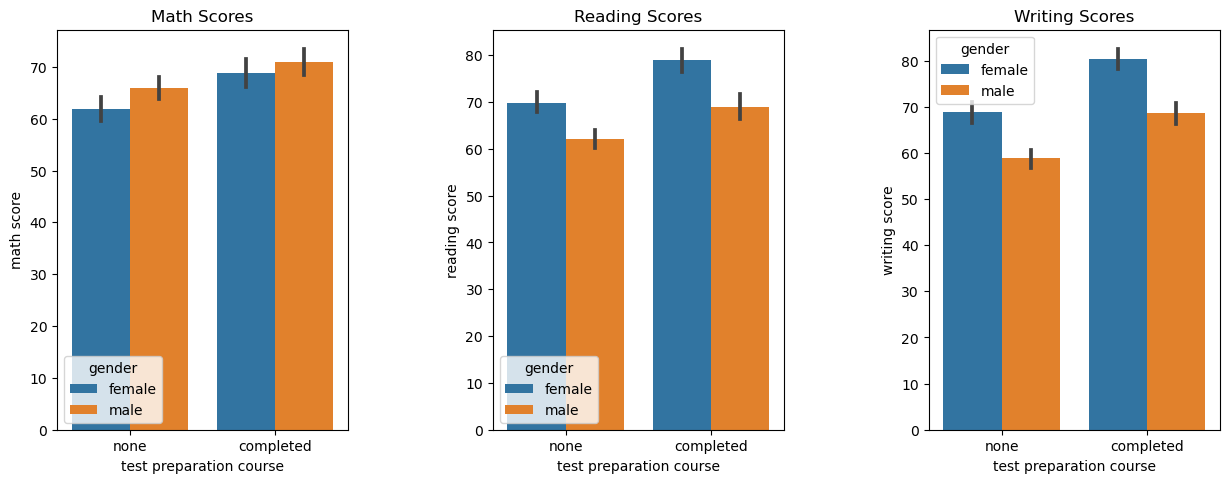

In [57]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="gender", y="math score", x="test preparation course", data=df)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="gender", y="reading score", x="test preparation course", data=df)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="gender", y="writing score", x="test preparation course", data=df)
plt.show()